# Introduction to Scikit-Learn Regression and Classification

## Step 1 - Generating the Dataset

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 7)

np.random.seed(0)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame(index=pd.date_range('2000', '2020'))
df['BookPressure'] = np.random.randn(len(df)) * 2
df['TradePressure'] = np.random.randn(len(df)) * 100
df['RelativeValue'] = np.random.randn(len(df)) * 50
df['Microstructure'] = np.random.randn(len(df)) * 10

true_coefficients = np.random.randint(low=-100, high=101, size=4) / 10
df['PriceChange'] = ((df['BookPressure'] * true_coefficients[0])
+ (df['TradePressure'] * true_coefficients[1])
+ (df['RelativeValue'] * true_coefficients[2])
+ (df['Microstructure'] * true_coefficients[3])
+ (np.random.randn(len(df)) * 200))

df['Price'] = df['PriceChange'].cumsum(0) + 100000

In [3]:
true_coefficients

array([ 7.5, 10. ,  3.6, -0.2])

In [4]:
df

,BookPressure,TradePressure,RelativeValue,Microstructure,PriceChange,Price
2000-01-01,3.528105,78.748732,51.453968,-22.370626,1075.516123,101075.516123
2000-01-02,0.800314,105.487879,-34.317623,7.226798,747.756250,101823.272373
2000-01-03,1.957476,140.289529,79.605550,1.446096,1721.993945,103545.266317
2000-01-04,4.481786,-34.031538,-25.749535,-3.551731,-256.861319,103288.404999
2000-01-05,3.735116,-76.624284,21.565713,7.914757,-595.571055,102692.833944
2000-01-06,-1.954556,79.106081,61.626123,-10.397867,1037.116652,103729.950596
2000-01-07,1.900177,-56.808415,36.909116,3.701459,-358.201485,103371.749111
2000-01-08,-0.302714,-168.643778,2.532409,15.328626,-1646.876551,101724.872561
2000-01-09,-0.206438,179.510666,13.593760,1.711807,1487.665439,103212.538000
2000-01-10,0.821197,-51.707579,-2.294862,0.900414,-983.168402,102229.369597


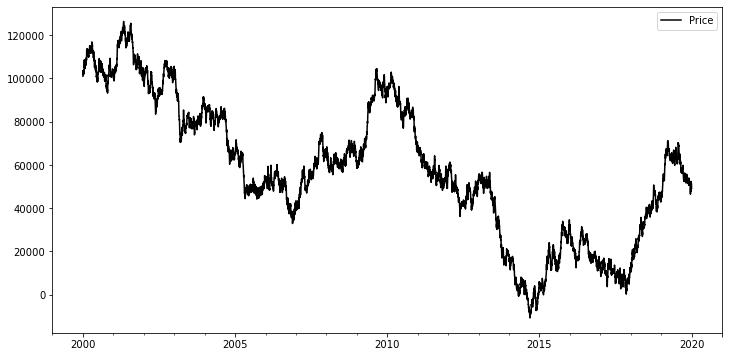

In [5]:
df['Price'].plot(figsize=(12, 6), color='black', legend='Price')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B79818908>,
      dtype=object)

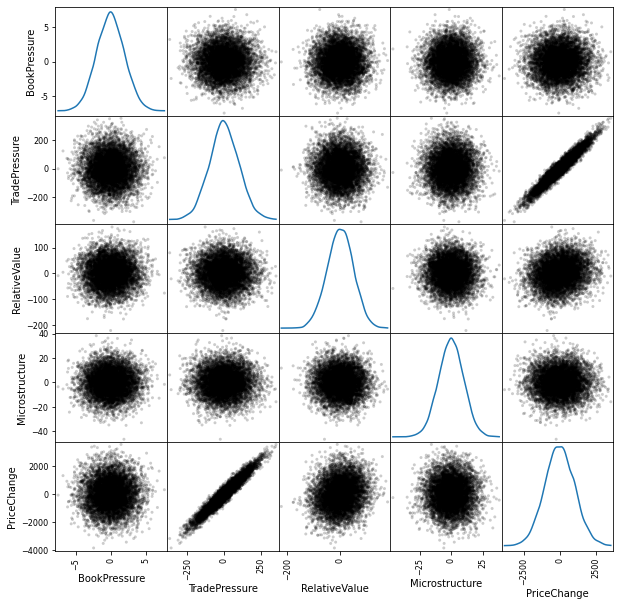

In [6]:
pd.plotting.scatter_matrix(df.drop('Price', axis=1), color='black', alpha=0.2, grid=True, diagonal='kde', figsize=(10, 10))

## Step 2 - Running RidgeCV Regression

In [7]:
features = df[['BookPressure', 'TradePressure', 'RelativeValue', 'Microstructure']]
target = df['PriceChange']

In [8]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV()
ridge.fit(features, target)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [9]:
true_coefficients, ridge.coef_

(array([ 7.5, 10. ,  3.6, -0.2]),
 array([8.38656325, 9.99179968, 3.51084716, 0.09787378]))

In [10]:
ridge.score(features, target)

0.9611925727539773

In [11]:
df['PredPrice'] = ridge.predict(features).cumsum(0) + 100000; df

,BookPressure,TradePressure,RelativeValue,Microstructure,PriceChange,Price,PredPrice
2000-01-01,3.528105,78.748732,51.453968,-22.370626,1075.516123,101075.516123,100993.827717
2000-01-02,0.800314,105.487879,-34.317623,7.226798,747.756250,101823.272373,101933.716716
2000-01-03,1.957476,140.289529,79.605550,1.446096,1721.993945,103545.266317,103630.442501
2000-01-04,4.481786,-34.031538,-25.749535,-3.551731,-256.861319,103288.404999,103236.182644
2000-01-05,3.735116,-76.624284,21.565713,7.914757,-595.571055,102692.833944,102577.321470
2000-01-06,-1.954556,79.106081,61.626123,-10.397867,1037.116652,103729.950596,103565.623774
2000-01-07,1.900177,-56.808415,36.909116,3.701459,-358.201485,103371.749111,103142.825930
2000-01-08,-0.302714,-168.643778,2.532409,15.328626,-1646.876551,101724.872561,101464.563491
2000-01-09,-0.206438,179.510666,13.593760,1.711807,1487.665439,103212.538000,103303.299924
2000-01-10,0.821197,-51.707579,-2.294862,0.900414,-983.168402,102229.369597,102784.506362


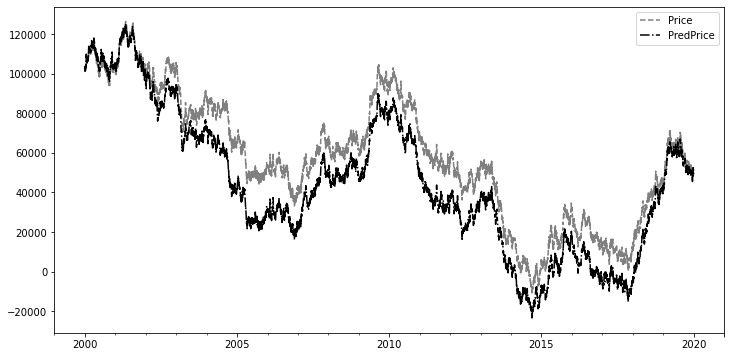

In [12]:
df['Price'].plot(figsize=(12, 6), color='gray', linestyle='--', legend='Price')
df['PredPrice'].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')

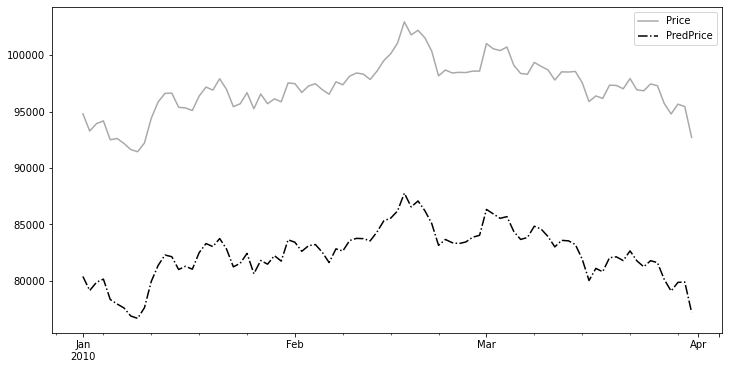

In [13]:
df['Price'].loc['2010-01-01':'2010-03-31'].plot(figsize=(12, 6), color='darkgray', linestyle='-', legend='Price')
df['PredPrice'].loc['2010-01-01':'2010-03-31'].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')

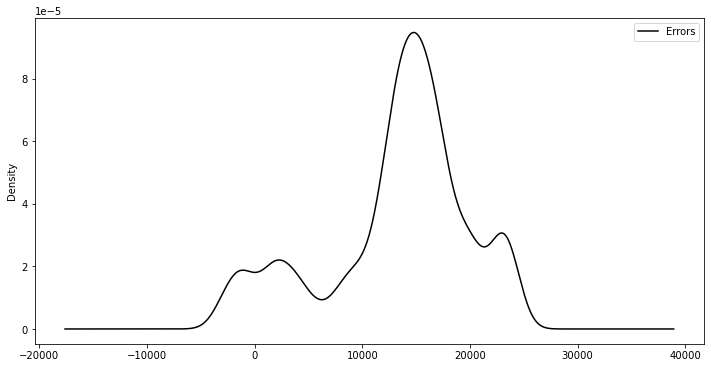

In [14]:
df['Errors'] = df['Price'] - df['PredPrice']
df['Errors'].plot(figsize=(12, 6), kind='kde', color='black', legend='Errors')

### Step 3 - Running Classification on the Dataset

In [15]:
target_discrete = pd.cut(target, bins=5, labels=[-2, -1, 0, 1, 2]).astype(int); target_discrete

2000-01-01    1
2000-01-02    1
2000-01-03    1
2000-01-04    0
2000-01-05    0
2000-01-06    1
2000-01-07    0
2000-01-08   -1
2000-01-09    1
2000-01-10   -1
2000-01-11    1
2000-01-12   -1
2000-01-13    1
2000-01-14    0
2000-01-15    1
2000-01-16    1
2000-01-17    2
2000-01-18    0
2000-01-19   -1
2000-01-20   -1
2000-01-21    0
2000-01-22    0
2000-01-23    0
2000-01-24    1
2000-01-25   -1
2000-01-26    0
2000-01-27    0
2000-01-28    0
2000-01-29    0
2000-01-30    0
             ..
2019-12-03    1
2019-12-04    0
2019-12-05   -1
2019-12-06   -1
2019-12-07    1
2019-12-08   -1
2019-12-09    1
2019-12-10    0
2019-12-11    1
2019-12-12    0
2019-12-13    0
2019-12-14   -1
2019-12-15   -2
2019-12-16    0
2019-12-17    0
2019-12-18    0
2019-12-19    1
2019-12-20    1
2019-12-21    1
2019-12-22   -1
2019-12-23    1
2019-12-24    1
2019-12-25    1
2019-12-26    1
2019-12-27   -1
2019-12-28    0
2019-12-29    0
2019-12-30    0
2019-12-31   -1
2020-01-01    0
Freq: D, Name: PriceChan

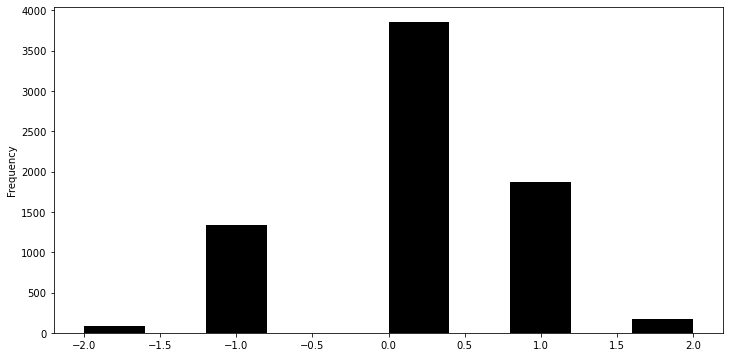

In [16]:
target_discrete.plot(figsize=(12, 6), kind='hist', color='black')

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5)
rf.fit(features, target_discrete)

RandomForestClassifier(max_depth=5)

In [18]:
rf.score(features, target_discrete)

0.88899534629072

In [19]:
df['DiscretePriceChange'] = target_discrete
df['PredDiscretePriceChange'] = rf.predict(features)
df

,BookPressure,TradePressure,RelativeValue,...,Errors,DiscretePriceChange,PredDiscretePriceChange
2000-01-01,3.528105,78.748732,51.453968,...,8.168841e+01,1,1
2000-01-02,0.800314,105.487879,-34.317623,...,-1.104443e+02,1,1
2000-01-03,1.957476,140.289529,79.605550,...,-8.517618e+01,1,1
2000-01-04,4.481786,-34.031538,-25.749535,...,5.222235e+01,0,0
2000-01-05,3.735116,-76.624284,21.565713,...,1.155125e+02,0,0
2000-01-06,-1.954556,79.106081,61.626123,...,1.643268e+02,1,1
2000-01-07,1.900177,-56.808415,36.909116,...,2.289232e+02,0,0
2000-01-08,-0.302714,-168.643778,2.532409,...,2.603091e+02,-1,-1
2000-01-09,-0.206438,179.510666,13.593760,...,-9.076192e+01,1,1
2000-01-10,0.821197,-51.707579,-2.294862,...,-5.551368e+02,-1,0


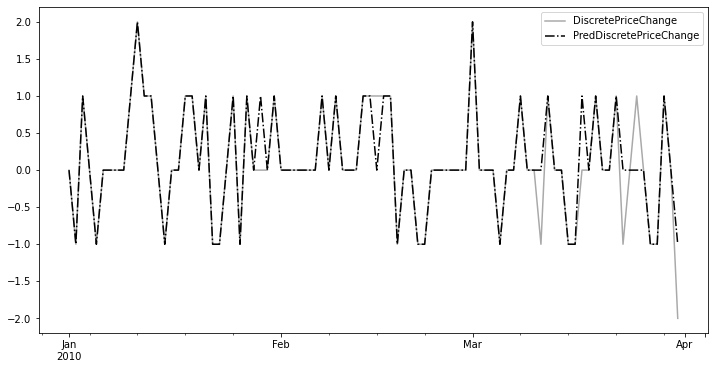

In [20]:
df['DiscretePriceChange'].loc['2010-01-01':'2010-03-31'].plot(figsize=(12, 6), color='darkgray', linestyle='-', legend='Price')
df['PredDiscretePriceChange'].loc['2010-01-01':'2010-03-31'].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')

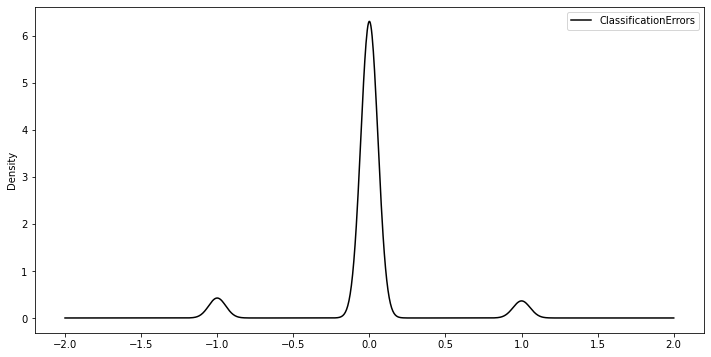

In [21]:
df['ClassificationErrors'] = df['DiscretePriceChange'] - df['PredDiscretePriceChange']
df['ClassificationErrors'].plot(figsize=(12, 6), kind='kde', color='black', legend='ClassificationErrors')